In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
cad = pd.read_parquet('/Users/ouharuhua/Desktop/Datathon_2024/Data/cad9.parquet.gzip', engine='pyarrow')
inverventions1 = pd.read_parquet('/Users/ouharuhua/Desktop/Datathon_2024/Data/interventions1.parquet', engine='pyarrow')
interventions2 = pd.read_parquet('/Users/ouharuhua/Desktop/Datathon_2024/Data/interventions2.parquet', engine='pyarrow')
interventions3 = pd.read_parquet('/Users/ouharuhua/Desktop/Datathon_2024/Data/interventions3.parquet', engine='pyarrow')
interventions_bxl1 = pd.read_parquet('/Users/ouharuhua/Desktop/Datathon_2024/Data/interventions_bxl.parquet.gzip', engine='pyarrow')
interventions_bxl2 = pd.read_parquet('/Users/ouharuhua/Desktop/Datathon_2024/Data/interventions_bxl2.parquet.gzip', engine='pyarrow')

In [68]:
# Assuming dfs is a list of DataFrames
dfs = [cad, inverventions1, interventions2, interventions3, interventions_bxl1, interventions_bxl2]  # List of your DataFrames
file_names = ["cad9", "inverventions1", "interventions2",'interventions3','interventions_bxl','interventions_bxl2']  # List of file names

for df,file_name in zip(dfs, file_names):
    # Convert column names from uppercase to lowercase
    df.rename(columns=lambda x: x.lower(), inplace=True)
    
    # Strip whitespace from column names
    df.columns = [col.strip() for col in df.columns]
    # Replace blank spaces with underscores in column names
    df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
    
    # Add a new column 'file_name' with the name of the DataFrame
    df['file_name'] = file_name
    
    print(df.columns.tolist())

['province', 'mission_id', 'service_name', 'latitude_permanence', 'longitude_permanence', 'permanence_short_name', 'permanence_long_name', 'vector_type', 'eventtype_trip', 'eventsubtype_trip', 'eventlevel_trip', 'cityname_intervention', 'citysectionname_intervention', 'latitude_intervention', 'longitude_intervention', 'province_invervention', 't0', 't1', 't1confirmed', 't2', 't3', 't4', 't5', 't6', 't7', 'name_destination_hospital', 'intervention_time_(t1reported)', 'intervention_time_(t1confirmed)', 'departure_time_(t1reported)', 'departure_time_(t1confirmed)', 'ui', 'id', 'mission_nr', 'ambucode', 'unit_id', 'file_name']
['mission_id', 'service_name', 'postalcode_permanence', 'cityname_permanence', 'streetname_permanence', 'housenumber_permanence', 'latitude_permanence', 'longitude_permanence', 'permanence_short_name', 'permanence_long_name', 'vector_type', 'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip', 'eventlevel_trip', 'postalcode_intervention', 'cityname_interve

cad9

In [69]:
# Delete columns
columns_to_delete = ['citysectionname_intervention', 'province', 'name_destination_hospital','ui','id','mission_nr','ambucode','unit_id','eventsubtype_trip']
cad.drop(columns=columns_to_delete, inplace=True)

Intervention bxl

In [70]:
# Extract eventlevel using regular expression
interventions_bxl2['eventlevel_trip'] = interventions_bxl2['eventtype_and_eventlevel'].str.extract('(N\d{2})', expand=False)

# Remove series of characters from the column 'eventtype_and_eventlevel'
interventions_bxl2['eventtype_trip'] = interventions_bxl2['eventtype_and_eventlevel'].str.replace(r'N0[1-6]\s*-\s*', '', regex=True)

# Rename columns
interventions_bxl2.rename(columns={'service_name_nl': 'service_name', 'permanence_long_name_nl': 'permanence_long_name',
                                  'permanence_short_name_nl': 'permanence_short_name', 'vector_type_nl': 'vector_type', 
                                  'abandon_reason_nl': 'abandon_reason'}, inplace=True)

# Delete columns
columns_to_delete = ['service_name_fr', 'permanence_long_name_fr', 'permanence_short_name_fr','vector_type_fr',
                     'eventtype_and_eventlevel','description_nl','ic_description_nl','creationtime','abandon_reason_fr']
interventions_bxl2.drop(columns=columns_to_delete, inplace=True)


In [71]:
#interventions_bxl1.to_csv('/Users/ouharuhua/Desktop/Datathon_2024/Processed/intervention_bxl1.csv', index=False)
#interventions_bxl2.to_csv('/Users/ouharuhua/Desktop/Datathon_2024/Processed/intervention_bxl2.csv', index=False)

In [72]:
# Concatenate rows
interventions_bxl = pd.concat([interventions_bxl1, interventions_bxl2], ignore_index=True)
#interventions_bxl.to_csv('/Users/ouharuhua/Desktop/Datathon_2024/Processed/intervention_bxl.csv', index=False)

In [73]:
# Rename columns
interventions_bxl.rename(columns={'intervention_time_t1reported': 'intervention_time_(t1reported)', 
                                  'departure_time_t1reported': 'departure_time_(t1reported)',
                                  'calculated_distance_destination_': 'calculated_distance_destination'}, inplace=True)

# Delete columns
columns_to_delete = ['calculated_traveltime_departure_', 'calculated_distance_departure_to']
interventions_bxl.drop(columns=columns_to_delete, inplace=True)

Intervention

In [74]:
# Concatenate rows
interventions_123 = pd.concat([inverventions1, interventions2, interventions3], ignore_index=True)


In [75]:
# Assuming dfs is a list of DataFrames
dfs = [cad, interventions_123, interventions_bxl]  # List of your DataFrames

for i, df in enumerate(dfs):
    # Convert column names from uppercase to lowercase
    df.rename(columns=lambda x: x.lower(), inplace=True)
    # Replace blank spaces with underscores in column names
    df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
    print(df.columns.tolist())

['mission_id', 'service_name', 'latitude_permanence', 'longitude_permanence', 'permanence_short_name', 'permanence_long_name', 'vector_type', 'eventtype_trip', 'eventlevel_trip', 'cityname_intervention', 'latitude_intervention', 'longitude_intervention', 'province_invervention', 't0', 't1', 't1confirmed', 't2', 't3', 't4', 't5', 't6', 't7', 'intervention_time_(t1reported)', 'intervention_time_(t1confirmed)', 'departure_time_(t1reported)', 'departure_time_(t1confirmed)', 'file_name']
['mission_id', 'service_name', 'postalcode_permanence', 'cityname_permanence', 'streetname_permanence', 'housenumber_permanence', 'latitude_permanence', 'longitude_permanence', 'permanence_short_name', 'permanence_long_name', 'vector_type', 'eventtype_firstcall', 'eventlevel_firstcall', 'eventtype_trip', 'eventlevel_trip', 'postalcode_intervention', 'cityname_intervention', 'latitude_intervention', 'longitude_intervention', 'province_intervention', 't0', 't1', 't1confirmed', 't2', 't3', 't4', 't5', 't6', 't

In [76]:
# Concatenate rows
interventions = pd.concat([cad, interventions_123, interventions_bxl], ignore_index=True)


eventtype eventlevel

In [77]:
# Fill NaN values in eventtype_trip with values from eventtype_firstcall
interventions['eventtype'] = interventions['eventtype_trip'].fillna(interventions['eventtype_firstcall'])
interventions['eventlevel'] = interventions['eventlevel_trip'].fillna(interventions['eventlevel_firstcall'])

# Drop the temporary columns if needed
interventions.drop(columns=['eventtype_trip', 'eventtype_firstcall', 'eventlevel_trip', 'eventlevel_firstcall'], inplace=True)


In [78]:
# Remove series of characters from the column 'eventtype_and_eventlevel'
interventions['eventtype'] = interventions['eventtype'].str.replace('- ', '', regex=True)
# interventions['eventlevel'] = interventions['eventlevel'].str.replace('0', '', regex=True)


lat lon

In [79]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045549 entries, 0 to 1045548
Data columns (total 46 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   mission_id                        1045549 non-null  int64  
 1   service_name                      948462 non-null   object 
 2   latitude_permanence               876274 non-null   float64
 3   longitude_permanence              956056 non-null   float64
 4   permanence_short_name             1041014 non-null  object 
 5   permanence_long_name              948631 non-null   object 
 6   vector_type                       1026230 non-null  object 
 7   cityname_intervention             1045342 non-null  object 
 8   latitude_intervention             954814 non-null   float64
 9   longitude_intervention            1044949 non-null  float64
 10  province_invervention             289303 non-null   object 
 11  t0                                104

In [80]:
# Define the range of latitudes and longitudes
max_lat = 52
max_lon = 7

# Adjust latitude values
for i in range(len(interventions)):
    lat = interventions.loc[i, 'latitude_intervention']
    if lat > max_lat:
        while lat > max_lat:
            lat /= 10
    interventions.loc[i, 'latitude_intervention'] = lat

# Adjust longitude values
for i in range(len(interventions)):
    lon = interventions.loc[i, 'longitude_intervention']
    if lon > max_lon:
        while lon > max_lon:
            lon /= 10
    interventions.loc[i, 'longitude_intervention'] = lon

In [81]:
interventions['latitude_intervention'] = interventions['latitude_intervention'].replace(0, np.nan)
interventions['longitude_intervention'] = interventions['longitude_intervention'].replace(0, np.nan)


In [82]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045549 entries, 0 to 1045548
Data columns (total 46 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   mission_id                        1045549 non-null  int64  
 1   service_name                      948462 non-null   object 
 2   latitude_permanence               876274 non-null   float64
 3   longitude_permanence              956056 non-null   float64
 4   permanence_short_name             1041014 non-null  object 
 5   permanence_long_name              948631 non-null   object 
 6   vector_type                       1026230 non-null  object 
 7   cityname_intervention             1045342 non-null  object 
 8   latitude_intervention             954810 non-null   float64
 9   longitude_intervention            1044945 non-null  float64
 10  province_invervention             289303 non-null   object 
 11  t0                                104

In [83]:
# Define the boundaries of Belgium in terms of latitude and longitude
belgium_boundaries = {
    'min_lat': 49.5,
    'max_lat': 51.5,
    'min_lon': 2.5,
    'max_lon': 6.5
}

# Filter out coordinates outside Belgium
interventions = interventions[(interventions['latitude_intervention'] >= belgium_boundaries['min_lat']) & 
        (interventions['latitude_intervention'] <= belgium_boundaries['max_lat']) &
        (interventions['longitude_intervention'] >= belgium_boundaries['min_lon']) &
        (interventions['longitude_intervention'] <= belgium_boundaries['max_lon'])]

In [84]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954538 entries, 0 to 1045548
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   mission_id                        954538 non-null  int64  
 1   service_name                      857467 non-null  object 
 2   latitude_permanence               869406 non-null  float64
 3   longitude_permanence              874523 non-null  float64
 4   permanence_short_name             950022 non-null  object 
 5   permanence_long_name              857644 non-null  object 
 6   vector_type                       935230 non-null  object 
 7   cityname_intervention             954337 non-null  object 
 8   latitude_intervention             954538 non-null  float64
 9   longitude_intervention            954538 non-null  float64
 10  province_invervention             289293 non-null  object 
 11  t0                                950825 non-null  objec

interventions - date type

In [85]:
df = interventions

In [86]:
# datatype conversion postalcode_permanence
df['postalcode_permanence'] = df['postalcode_permanence'].astype(str)

In [87]:
# split dataframe into 6 to perform datetime conversion
df1 = df[df['file_name'] == 'cad9'].copy()
df2 = df[df['file_name'] == 'interventions_bxl'].copy()
df3 = df[df['file_name'] == 'interventions_bxl2'].copy()
df4 = df[df['file_name'] == 'interventions2'].copy()
df5 = df[df['file_name'] == 'interventions3'].copy()
df6 = df[df['file_name'] == 'inverventions1'].copy() # note there is a typo

In [88]:
# datetime conversion

# split the big frame into smaller ones
col = 't0'
df1[col] = pd.to_datetime(df1[col])
df2[col] = pd.to_datetime(df2[col], utc=True)
df3[col] = pd.to_datetime(df3[col], format='%d%b%y:%H:%M:%S')
df4[col] = pd.to_datetime(df4[col], format='%d%b%y:%H:%M:%S')
df5[col] = pd.to_datetime(df5[col], format='%d%b%y:%H:%M:%S')
df6[col] = pd.to_datetime(df6[col], format='%d%b%y:%H:%M:%S')

In [89]:
# convert to datetime
col = 't3'
df1[col] = pd.to_datetime(df1[col])
df2[col] = pd.to_datetime(df2[col], utc=True)
df3[col] = pd.to_datetime(df3[col], format='%d%b%y:%H:%M:%S')
df4[col] = pd.to_datetime(df4[col])
df5[col] = pd.to_datetime(df5[col])
df6[col] = pd.to_datetime(df6[col])

In [90]:
# convert utc time to local time
col = 't0'
df2[col] = df2[col].dt.tz_convert('Europe/Brussels')
# drop the time zone information after conversion
df2[col] = df2[col].dt.tz_localize(None)

In [91]:
# convert utc time to local time
col = 't3'
df2[col] = df2[col].dt.tz_convert('Europe/Brussels')
# drop the time zone information after conversion
df2[col] = df2[col].dt.tz_localize(None)

In [92]:
# merge back to the full frame df
dfs = [df1,df2,df3,df4,df5,df6]
df = pd.concat(dfs)

array([[<Axes: title={'center': 'duration_t3-t0'}>]], dtype=object)

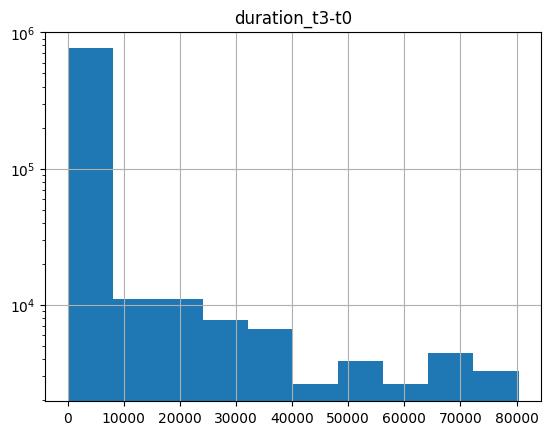

In [93]:
# calculate duration in minutes from t3 to t0
df['duration_t3-t0'] = (df['t3'] - df['t0']).dt.total_seconds() / 60

# check duration
mask = df['duration_t3-t0']>0
df_mask = df.loc[mask,['file_name','t3','t0','duration_t3-t0']]

df_mask[['duration_t3-t0']].hist(log=True)

In [94]:
# calculate the date of t0
df['t0_date'] = df['t0'].dt.date
df['t0_date'] = pd.to_datetime(df['t0_date'])

In [95]:
# check for duplicates
duplicated_missions = df[df.duplicated(subset= ['mission_id'])].mission_id.to_list()
df_duplicates = df[df['mission_id'].isin(duplicated_missions)]
# df_duplicates.to_csv('inv123_duplicates.csv',index=False)


# drop duplicated mission id only for cardiotic arrest
# TODO

In [96]:
# inspect abandon reasons
col = 'abandon_reason'
frequency_count = df[col].value_counts()

#df_refuse = df[df['abandon_reason'] == 'Weigering van vervoer']
#col = ['eventtype']
#frequency_count = df_refuse[col].value_counts()
#frequency_count[:15]


In [97]:
# check duration and waiting_time

# round the duration to compare with waiting_time
df['duration_t3-t0_round'] = df['duration_t3-t0'].round()

cols = ['t3','t0','duration_t3-t0','duration_t3-t0_round','waiting_time',]

#df_waiting_check = df.loc[abs(df['duration_t3-t0_round']-df['waiting_time'])>1,cols]
#df_waiting_check.to_csv('df_waiting_check.csv')

# =================CORRECTION STARTS ========================
# replace negative durations with N/A
df.loc[df['duration_t3-t0'] <=0, 'duration_t3-t0'] = np.nan

# replace waiting_time > 24hours with N/A
df.loc[df['waiting_time'] > 24*60, 'waiting_time'] = np.nan
# replace waiting_time = 0 with N/A
df.loc[df['waiting_time'] <= 0, 'waiting_time'] = np.nan

# round the duration to compare with waiting_time
df['duration_t3-t0_round'] = df['duration_t3-t0'].round()

# for cases when duration - waiting_timie = 60, use waiting_time instead of duration
rows_to_update = df[(df['duration_t3-t0_round'] - df['waiting_time'] >= 59) & (abs(df['duration_t3-t0_round']-df['waiting_time'])<=61)].index
df.loc[rows_to_update, 'duration_t3-t0'] -= 60

# round the duration to compare with waiting_time
df['duration_t3-t0_round'] = df['duration_t3-t0'].round()

# check if na values in duration can be filled by waiting_time
#df.loc[df['duration_t3-t0'].isnull() & df['waiting_time'].notnull()].to_csv('df_waiting_time_check_2.csv')

# remove the helper column
df.drop('duration_t3-t0_round',axis=1,inplace=True)

# =================CORRECTION ENDS ========================

In [98]:
interventions = df

mission_id delete duplicate

In [99]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954538 entries, 0 to 490027
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   mission_id                        954538 non-null  int64         
 1   service_name                      857467 non-null  object        
 2   latitude_permanence               869406 non-null  float64       
 3   longitude_permanence              874523 non-null  float64       
 4   permanence_short_name             950022 non-null  object        
 5   permanence_long_name              857644 non-null  object        
 6   vector_type                       935230 non-null  object        
 7   cityname_intervention             954337 non-null  object        
 8   latitude_intervention             954538 non-null  float64       
 9   longitude_intervention            954538 non-null  float64       
 10  province_invervention             289

In [100]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954538 entries, 0 to 490027
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   mission_id                        954538 non-null  int64         
 1   service_name                      857467 non-null  object        
 2   latitude_permanence               869406 non-null  float64       
 3   longitude_permanence              874523 non-null  float64       
 4   permanence_short_name             950022 non-null  object        
 5   permanence_long_name              857644 non-null  object        
 6   vector_type                       935230 non-null  object        
 7   cityname_intervention             954337 non-null  object        
 8   latitude_intervention             954538 non-null  float64       
 9   longitude_intervention            954538 non-null  float64       
 10  province_invervention             289

filter eventtype

In [101]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954538 entries, 0 to 490027
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   mission_id                        954538 non-null  int64         
 1   service_name                      857467 non-null  object        
 2   latitude_permanence               869406 non-null  float64       
 3   longitude_permanence              874523 non-null  float64       
 4   permanence_short_name             950022 non-null  object        
 5   permanence_long_name              857644 non-null  object        
 6   vector_type                       935230 non-null  object        
 7   cityname_intervention             954337 non-null  object        
 8   latitude_intervention             954538 non-null  float64       
 9   longitude_intervention            954538 non-null  float64       
 10  province_invervention             289

In [102]:
# Count of each unique value in 'Column1'
value_counts_eventtype = interventions['eventtype'].value_counts()

value_counts_eventtype

eventtype
P033 Trauma                                        94616
P010 Respiratory problems                          56718
P026 Unclear problem                               54672
P033 TRAUMA                                        53834
P019 Unconscious syncope                           38192
                                                   ...  
SI (4.4.0) underground pipeline rupture                1
TI (3.0.0) general                                     1
SI B(4.2.3) Aircraft in distress Full EM type 3        1
Y_SI LUHA CRASH OPCO+DGH                               1
LO (5.1.1) assistance ambulance manpower               1
Name: count, Length: 280, dtype: int64

In [103]:
# Split column values into two parts
interventions[['eventtype_code', 'eventtype_exp']] = interventions['eventtype'].str.split(n=1, expand=True)

# Drop the original column
interventions.drop(columns=['eventtype'], inplace=True)

In [104]:
interventions.to_csv('/Users/ouharuhua/Desktop/Datathon_2024/Processed/interventions.csv', index=False)


In [105]:
# Count of each unique value in 'Column1'
value_counts_eventtype = interventions['eventtype_code'].value_counts()

value_counts_eventtype

eventtype_code
P033        148450
P010         83070
P026         74658
P019         62516
P011         44702
             ...  
PERSONEN         1
OOS              1
Medisch          1
Z_BR             1
Test             1
Name: count, Length: 95, dtype: int64

In [106]:
# Count of each unique value in 'Column1'
value_counts_abandon = interventions['abandon_reason'].value_counts()

value_counts_abandon

abandon_reason
Weigering van vervoer      25926
Verzorgd ter plaatse       17150
Error                      14966
Zonder patient             10230
Geannuleerd                10129
Overleden                   6566
Vervoerd door politie       4665
Vervoerd door derden        3807
Weigering vervoer           1692
Loos alarm goed bedoeld      616
Kwaadwillig                  515
Geannuleerde rit             472
Vervoer door derden          369
Ter plaatste behandeld       300
Dood Ter Plaatse             130
Kwaadwillige oproep           28
Name: count, dtype: int64

In [107]:
# Count of each unique value in 'Column1'
value_counts_city = interventions['cityname_intervention'].value_counts()

value_counts_city

cityname_intervention
GENT                               26692
Antwerpen (Antwerpen)              23174
Li√®ge (Li√®ge)                    16493
Bruxelles (Bruxelles)              13270
Anderlecht (Anderlecht)            12475
                                   ...  
Tenneville (Laneuville-au-Bois)        1
Libramont-Chevigny (Bras-Haut)         1
Vielsalm (Comt√©)                      1
Couvin (Cul-des-Sarts)                 1
Sint-Lambrechts-Woluwe                 1
Name: count, Length: 3620, dtype: int64

In [108]:
# Columns to keep
columns_to_keep = ['mission_id','t0_date','duration_t3-t0', 'eventtype_code', 'eventlevel', 'province_intervention', 'postalcode_intervention','latitude_intervention','longitude_intervention','abandon_reason']

interventions_geoloc = interventions[columns_to_keep]
interventions_geoloc.to_csv('/Users/ouharuhua/Desktop/Datathon_2024/Processed/interventions_geoloc.csv', index=False)

In [109]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954538 entries, 0 to 490027
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   mission_id                        954538 non-null  int64         
 1   service_name                      857467 non-null  object        
 2   latitude_permanence               869406 non-null  float64       
 3   longitude_permanence              874523 non-null  float64       
 4   permanence_short_name             950022 non-null  object        
 5   permanence_long_name              857644 non-null  object        
 6   vector_type                       935230 non-null  object        
 7   cityname_intervention             954337 non-null  object        
 8   latitude_intervention             954538 non-null  float64       
 9   longitude_intervention            954538 non-null  float64       
 10  province_invervention             289

cardiac arrest - case

In [110]:
# symptom: https://www.hopkinsmedicine.org/health/conditions-and-diseases/cardiac-arrest
# Code to filter: P003 Cardiac arrest 心脏骤停

# Filter rows where eventtype_code equals 'P003'
interventions_ca = interventions[interventions['eventtype_code'] == 'P003']

# Columns to keep
columns_to_keep = ['mission_id','t0_date','duration_t3-t0', 'eventtype_code', 'eventlevel', 'province_intervention', 'postalcode_intervention','latitude_intervention','longitude_intervention','abandon_reason']

# Select only the columns to keep
interventions_ca = interventions_ca[columns_to_keep]

interventions_ca.to_csv('/Users/ouharuhua/Desktop/Datathon_2024/Processed/interventions_ca.csv', index=False)


In [111]:
# Count of each unique value in 'Column1'
value_counts_abandon = interventions_ca['abandon_reason'].value_counts()

value_counts_abandon

abandon_reason
Overleden                  2551
Geannuleerd                  81
Error                        45
Dood Ter Plaatse             28
Weigering van vervoer        25
Zonder patient               23
Vervoerd door derden         18
Verzorgd ter plaatse         13
Vervoerd door politie        10
Geannuleerde rit              3
Kwaadwillig                   3
Vervoer door derden           1
Loos alarm goed bedoeld       1
Name: count, dtype: int64

In [112]:
# Values to filter out
values_to_filter = ['Error', 'Loos alarm goed bedoeld', 'Kwaadwillig', 'Geannuleerde rit', 'Kwaadwillige oproep']

# Filtering out rows with specified values
interventions_ca = interventions_ca[~interventions_ca['abandon_reason'].isin(values_to_filter)]

# interventions_ca.to_csv('/Users/ouharuhua/Desktop/Datathon_2024/Processed/interventions_ca.csv', index=False)

In [113]:
# Count of each unique value in 'Column1'
value_counts_abandon = interventions_ca['abandon_reason'].value_counts()

value_counts_abandon

abandon_reason
Overleden                2551
Geannuleerd                81
Dood Ter Plaatse           28
Weigering van vervoer      25
Zonder patient             23
Vervoerd door derden       18
Verzorgd ter plaatse       13
Vervoerd door politie      10
Vervoer door derden         1
Name: count, dtype: int64

In [114]:
interventions_ca_geoloc = interventions_ca[columns_to_keep]
interventions_ca_geoloc.to_csv('/Users/ouharuhua/Desktop/Datathon_2024/Processed/interventions_ca_geoloc.csv', index=False)

In [115]:
# Assuming interventions is your DataFrame
interventions_dead = interventions_ca[interventions_ca['abandon_reason'] == 'Overleden']
interventions_dead

,mission_id,t0_date,duration_t3-t0,eventtype_code,eventlevel,province_intervention,postalcode_intervention,latitude_intervention,longitude_intervention,abandon_reason
891489,20222490200,2022-09-06,NaN,P003,N1,NaN,1070.0,50.83808,4.30484,Overleden
891599,20222500029,2022-09-07,8.720030,P003,N1,NaN,1050.0,50.82480,4.38185,Overleden
892271,20222510199,2022-09-08,8.786012,P003,N1,NaN,1080.0,50.84948,4.32034,Overleden
895559,20222590086,2022-09-16,10.747757,P003,N1,NaN,1150.0,50.83126,4.46485,Overleden
896060,20222600127,2022-09-17,11.051311,P003,N1,NaN,1180.0,50.81547,4.36499,Overleden
...,...,...,...,...,...,...,...,...,...,...
488494,50221880328,2022-07-07,7.780883,P003,N1,HAI,None,50.42360,4.42585,Overleden
489151,50221900122,2022-07-09,12.389167,P003,N1,HAI,None,50.71304,3.57955,Overleden
489172,50221900209,2022-07-09,12.138483,P003,N5,HAI,None,50.47807,3.64474,Overleden
489662,50221910287,2022-07-10,7.557850,P003,N1,HAI,None,50.03854,4.26365,Overleden


In [116]:
# Count of each unique value in 'Column1'
value_counts_dead_level = interventions_dead['eventlevel'].value_counts()

value_counts_dead_level # light level can also be dead if not handeled in time

eventlevel
N1     1459
N0      499
N5      424
N2      163
N6        5
N7B       1
Name: count, dtype: int64